In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [133]:
# Read in the dataset
df = pd.read_csv("mobile.csv")

In [134]:
# Drop unnecessary columns
df = df.drop(columns=["Initial release", "Game"])

In [135]:
# Check for missing values
df.isnull().sum()

Revenue         0
Publisher(s)    0
Genre(s)        0
dtype: int64

In [136]:
# Handle missing values
df = df.dropna()

In [137]:
df.head()

,Revenue,Publisher(s),Genre(s)
0,14667500000,Tencent Games,MOBA
1,10000000000,Mixi,Puzzle / RPG / Strategy
2,9000000000,Tencent Games / Krafton / VNG Games,Battle royale
3,8578340000,GungHo Online Entertainment,RPG / Puzzle
4,8000000000,Supercell (Tencent),Strategy


In [138]:
# Convert string columns to numerical using label encoding
le = LabelEncoder()
df["Publisher(s)"] = le.fit_transform(df["Publisher(s)"])
df["Genre(s)"] = le.fit_transform(df["Genre(s)"])


In [139]:
# Convert string columns to numerical using label encoding
le = LabelEncoder()
df["Publisher(s)"] = le.fit_transform(df["Publisher(s)"])
df["Genre(s)"] = le.fit_transform(df["Genre(s)"])

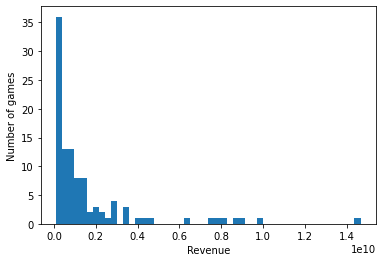

In [140]:
# Plot histogram of Revenue
plt.hist(df["Revenue"], bins=50)
plt.xlabel("Revenue")
plt.ylabel("Number of games")
plt.show()

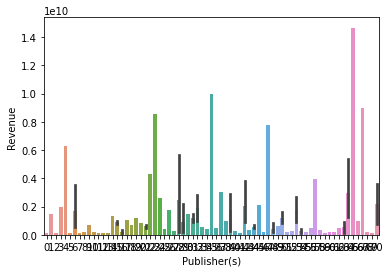

In [141]:
# Plot bar plot of Publisher(s) vs. Revenue
sns.barplot(x="Publisher(s)", y="Revenue", data=df)
plt.show()

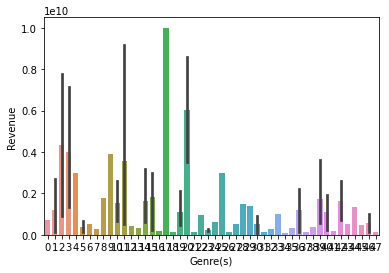

In [142]:
# Plot bar plot of Genre vs. Revenue
sns.barplot(x="Genre(s)", y="Revenue", data=df)
plt.show()

In [143]:
# Split the data into training and test sets
X = df.drop(columns=["Revenue"])
y = df["Revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [145]:
# Make predictions on the test set using the linear model
linear_predictions = linear_model.predict(X_test)

In [146]:
# Evaluate the linear model
linear_mae = mean_absolute_error(y_test, linear_predictions)
print("Linear model mean absolute error:", linear_mae)

Linear model mean absolute error: 1887535388.1081398


In [147]:
# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [148]:
# Make predictions on the test set using the XGBoost model
xgb_predictions = xgb_model.predict(X_test)

In [149]:
# Evaluate the XGBoost model
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print("XGBoost model mean absolute error:", xgb_mae)

XGBoost model mean absolute error: 2104670137.142857


In [150]:
# Create and train the random forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [151]:
# Make predictions on the test set using the random forest model
rf_predictions = rf_model.predict(X_test)


In [152]:
# Evaluate the random forest model
rf_mae = mean_absolute_error(y_test, rf_predictions)
print("Random forest model mean absolute error:", rf_mae)

Random forest model mean absolute error: 1927267099.0929706


In [153]:
# Select the model with the lowest mean absolute error
if linear_mae < xgb_mae and linear_mae < rf_mae:
  selected_model = linear_model
  selected_mae = linear_mae
elif xgb_mae < linear_mae and xgb_mae < rf_mae:
  selected_model = xgb_model
  selected_mae

In [154]:
# Select the model with the lowest mean absolute error
if linear_mae < xgb_mae and linear_mae < rf_mae:
  selected_model = linear_model
  selected_mae = linear_mae
elif xgb_mae < linear_mae and xgb_mae < rf_mae:
  selected_model = xgb_model
  selected_mae = xgb_mae
else:
  selected_model = rf_model
  selected_mae = rf_mae


In [155]:
# Print the mean absolute error of the selected model
print("Selected model mean absolute error:", selected_mae)


Selected model mean absolute error: 1887535388.1081398


In [156]:
# We chose the model with the lowest mean absolute error because this means
# that it is the most accurate model in terms of predicting the Revenue of a 
# game based on the Publisher(s) and Genre features.
